In [33]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

from warnings import filterwarnings
filterwarnings('ignore')

# Firstly we apply K Nearest Neighbors model.

In [34]:
df = pd.read_csv('../input/hitters/Hitters.csv')
df = df.dropna()
df = pd.get_dummies(df, columns = ['League','Division','NewLeague'], drop_first = True)
y = df['Salary']
X = df.drop('Salary', axis = 1)

In [35]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


# Now let`s separate the dataset as a train and test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

# let`s set the KNN model and then predict the X.

In [37]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)
knn_model

KNeighborsRegressor()

In [38]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

438.75715389787524

# KNN MODEL TUNING

In [39]:
knn_model

KNeighborsRegressor()

In [40]:
RMSE = []

for k in range(20):
    k = k + 2
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k =", k, "için RMSE değeri:", rmse)

k = 2 için RMSE değeri: 402.3490108489193
k = 3 için RMSE değeri: 420.8851794272263
k = 4 için RMSE değeri: 433.042118061226
k = 5 için RMSE değeri: 438.75715389787524
k = 6 için RMSE değeri: 447.4667559140737
k = 7 için RMSE değeri: 453.52179196594597
k = 8 için RMSE değeri: 454.3240838534937
k = 9 için RMSE değeri: 459.34454670250665
k = 10 için RMSE değeri: 453.9051617388242
k = 11 için RMSE değeri: 446.22600056274575
k = 12 için RMSE değeri: 450.1945294370967
k = 13 için RMSE değeri: 451.09507598791004
k = 14 için RMSE değeri: 451.4981224280202
k = 15 için RMSE değeri: 453.8713948576225
k = 16 için RMSE değeri: 451.7888216207132
k = 17 için RMSE değeri: 452.35446754486134
k = 18 için RMSE değeri: 442.2032272885196
k = 19 için RMSE değeri: 442.68511238980847
k = 20 için RMSE değeri: 442.7695798487812
k = 21 için RMSE değeri: 440.6012781451951


# *GRIDSEARCH CV*

In [41]:
knn_params = {'n_neighbors': np.arange(2,30,1)}

knn_model = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
knn_cv_model.best_params_

In [ ]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

# SUPPORT VECTOR REGRESSION (SVR)**

In [ ]:
svr_model = SVR('linear').fit(X_train, y_train)
svr_model

In [ ]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# *SVR TUNING*

In [ ]:
svr_model = SVR('linear')

svr_params = {'C': [0.01, 0.001, 0.2, 0.1, 0.5, 0.8,0.9,1]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10, n_jobs= -1, verbose= 2).fit(X_train, y_train)


In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR('linear', C = 0.001).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

*NON LINEAR*

In [ ]:
svr_model = SVR()

svr_params = {'C': [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500,1000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10, n_jobs= -1, verbose=2).fit(X_train, y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, y_pred))

# ARTIFICIAL NEURAL NETWORK

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)


In [ ]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

# Model Tuning

In [ ]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train_scaled, y_train)

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

# **CART**

In [ ]:
cart_model = DecisionTreeRegressor(random_state = 52)
cart_model.fit(X_train, y_train)

In [ ]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# *Model Tuning*

In [ ]:
?cart_model

In [ ]:
cart_params = {'max_depth': [2,3,4,5,10,20, 100, 1000],
              'min_samples_split': [2,10,5,30,50,10]}

In [ ]:
cart_model = DecisionTreeRegressor()

In [ ]:
cart_cv_model = GridSearchCV(cart_model,cart_params, cv = 10).fit(X_train,y_train)

In [ ]:
cart_cv_model.best_params_

In [ ]:
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train,y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
cart_tuned = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

# Random Forests

In [ ]:
!pip install skompiler
from skompiler import skompile
print(skompile(cart_tuned.predict).to('python/code'))

In [ ]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Model Tuning**

In [ ]:
df.shape

In [ ]:
?rf_model

In [ ]:
rf_params = {'max_depth': [5,8,10,None],
            'max_features': [2,5,10,15,17],
            'n_estimators': [100,200,500,1000],
            'min_samples_split': [2,5,10,20,30]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train,y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rf_tuned.feature_importances_

In [ ]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Feature Engineering

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
df = pd.read_csv("../input/hitters/Hitters.csv")
df = df.dropna()
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df["NEW_catbat"] = df["CAtBat"]/df["Years"]
df["NEW_chits"] =df["CHits"]/df["Years"]
df["NEW_chmrun"] = df["CHmRun"]/df["Years"]
df["NEW_cruns"] = df["CRuns"]/df["Years"]
df["NEW_crbi"] = df["CRBI"]/df["Years"]
df["NEW_cwalks"]=df["CWalks"]/df["Years"]

In [ ]:
y = df["Salary"]
X = df.drop('Salary', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
rf_params = {"max_depth": [5,8,None],
            "max_features": [2,3,4,5],
            "n_estimators": [100,200, 500],
            "min_samples_split": [2,5,7]}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42).fit(X,y)

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train,y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# **GBM**

In [ ]:
df = pd.read_csv("../input/hitters/Hitters.csv")
df = df.dropna()
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df["NEW_catbat"] = df["CAtBat"]/df["Years"]
df["NEW_chits"] =df["CHits"]/df["Years"]
df["NEW_chmrun"] = df["CHmRun"]/df["Years"]
df["NEW_cruns"] = df["CRuns"]/df["Years"]
df["NEW_crbi"] = df["CRBI"]/df["Years"]
df["NEW_cwalks"]=df["CWalks"]/df["Years"]

y = df["Salary"]
X = df.drop('Salary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
gbm_model

In [ ]:
y_pred = gbm_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

# Model Tuning

In [44]:
gbm_params = {'learning_rate': [0.001,0.1],
             'max_depth': [3,5,8,9,10],
             'n_estimators': [100,200,10,15],
             'subsample': [1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}

In [45]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [46]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 5, 
                            n_jobs=-1, 
                            verbose = 2).fit(X, y)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 625 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1461 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.1min finished


In [47]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 10,
 'n_estimators': 100,
 'subsample': 0.5}

In [ ]:
?gbm.tuned

In [48]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train,y_train)

In [49]:
y_pred = gbm_tuned.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.5706942403902

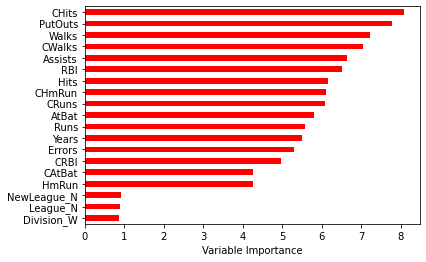

In [51]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [ ]:
df = pd.read_csv("../input/hitters/Hitters.csv")
df = df.dropna()
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df["NEW_catbat"] = df["CAtBat"]/df["Years"]
df["NEW_chits"] =df["CHits"]/df["Years"]
df["NEW_chmrun"] = df["CHmRun"]/df["Years"]
df["NEW_cruns"] = df["CRuns"]/df["Years"]
df["NEW_crbi"] = df["CRBI"]/df["Years"]
df["NEW_cwalks"]=df["CWalks"]/df["Years"]

y = df["Salary"]
X = df.drop('Salary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Model Tuning

In [ ]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

In [ ]:
xgb_cv_model.best_params_

In [ ]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# LIGHT GBM

In [4]:
print('asda')

asda


In [ ]:
df = pd.read_csv("../input/hitters/Hitters.csv")
df = df.dropna()
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df["NEW_catbat"] = df["CAtBat"]/df["Years"]
df["NEW_chits"] =df["CHits"]/df["Years"]
df["NEW_chmrun"] = df["CHmRun"]/df["Years"]
df["NEW_cruns"] = df["CRuns"]/df["Years"]
df["NEW_crbi"] = df["CRBI"]/df["Years"]
df["NEW_cwalks"]=df["CWalks"]/df["Years"]

y = df["Salary"]
X = df.drop('Salary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
#!pip install lightgbm
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb_model = LGBMRegressor().fit(X_train, y_train)
lgb_model

In [ ]:
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Model Tuning

In [ ]:
lgb_model = LGBMRegressor()
lgb_model

In [ ]:
lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5, 1],
              "n_estimators": [200,500,1000,5000],
              "max_depth": [2,4,6,7,10],
              "colsample_bytree": [1,0.8,0.5,0.4]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
?lgbm_tuned

# CatBoost

In [ ]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df["NEW_catbat"] = df["CAtBat"]/df["Years"]
df["NEW_chits"] =df["CHits"]/df["Years"]
df["NEW_chmrun"] = df["CHmRun"]/df["Years"]
df["NEW_cruns"] = df["CRuns"]/df["Years"]
df["NEW_crbi"] = df["CRBI"]/df["Years"]
df["NEW_cwalks"]=df["CWalks"]/df["Years"]

y = df["Salary"]
X = df.drop('Salary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
#!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
catb_model = CatBoostRegressor(verbose = False).fit(X_train, y_train)

In [ ]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [ ]:
catb_model = CatBoostRegressor()

In [ ]:
catb_cv_model = GridSearchCV(catb_model,catb_params, cv = 5,n_jobs = -1, 
             verbose = 2).fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(**catb_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# All Models

In [ ]:
df = pd.read_csv("../input/hitters/Hitters.csv")
df = df.dropna()
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df["NEW_catbat"] = df["CAtBat"]/df["Years"]
df["NEW_chits"] =df["CHits"]/df["Years"]
df["NEW_chmrun"] = df["CHmRun"]/df["Years"]
df["NEW_cruns"] = df["CRuns"]/df["Years"]
df["NEW_crbi"] = df["CRBI"]/df["Years"]
df["NEW_cwalks"]=df["CWalks"]/df["Years"]

y = df["Salary"]
X = df.drop('Salary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
def compML(df, y, alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_ismi = alg.__name__
    print(model_ismi, "Modeli Test Hatası:", RMSE)

In [ ]:
compML(df, "Salary", SVR)

In [ ]:
models = [LGBMRegressor,
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [ ]:
for model in models:
    compML(df, "Salary", model)

# Second Option 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))

In [ ]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        msg = "%s: (%f)" % (name, rmse)
        print(msg)

In [ ]:
for name, model in models:
        model.fit(X, y)
        y_pred = model.predict(X)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        msg = "%s: (%f)" % (name, rmse)
        print(msg)

In [ ]:
for name, model in models:
        rmse = np.sqrt(np.mean(-cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
        msg = "%s: (%f)" % (name, rmse)
        print(msg)